[['(27,',
  '24)',
  '(18,',
  '3)',
  '(28,',
  '28)',
  '(14,',
  '0)',
  '(14,',
  '29)',
  '(30,',
  '27)',
  '(31,',
  '20)',
  '(10,',
  '11)',
  '(22,',
  '5)',
  '(26,',
  '9)',
  '(12,',
  '10)',
  '(2,',
  '23)',
  '(21,',
  '11)',
  '(1,',
  '25)',
  '(11,',
  '2)',
  '(24,',
  '14)',
  '(3,',
  '12)',
  '(1,',
  '1)',
  '(3,',
  '20)',
  '(13,',
  '19)',
  '(25,',
  '12)',
  '(21,',
  '1)',
  '(30,',
  '9)',
  '(24,',
  '8)',
  '(0,',
  '24)',
  '(29,',
  '19)',
  '(20,',
  '23)',
  '(0,',
  '31)',
  '(27,',
  '30)',
  '(19,',
  '7)',
  '(7,',
  '23)',
  '(13,',
  '0)',
  '(29,',
  '31)',
  '(17,',
  '26)',
  '(11,',
  '17)',
  '(13,',
  '8)',
  '(0,',
  '14)',
  '(15,',
  '20)',
  '(14,',
  '10)',
  '(1,',
  '21)',
  '(9,',
  '7)',
  '(12,',
  '2)',
  '(11,',
  '5)',
  '(27,',
  '11)',
  '(10,',
  '23)',
  '(15,',
  '4)',
  '(9,',
  '24)',
  '(2,',
  '20)',
  '(6,',
  '19)',
  '\n'],
 ['(20,',
  '1)',
  '(23,',
  '9)',
  '(15,',
  '10)',
  '(23,',
  '14)',
  '(11,',
  '20)

In [29]:
def traiter(ligne):
    ligne = ligne.replace("(", "")
    ligne = ligne.replace(")", "")
    ligne = ligne.replace(",", "")
    ligne = ligne.split(" ")
    
    l =  [int(i) for i in ligne]
    
    return [(l[i], l[i+1]) for i in range(0, len(l), 2)]


log = open("log29.txt", "r")
lines = log.readlines()
traiter(lines[1][:-2])

[(27, 24),
 (18, 3),
 (28, 28),
 (14, 0),
 (14, 29),
 (30, 27),
 (31, 20),
 (10, 11),
 (22, 5),
 (26, 9),
 (12, 10),
 (2, 23),
 (21, 11),
 (1, 25),
 (11, 2),
 (24, 14),
 (3, 12),
 (1, 1),
 (3, 20),
 (13, 19),
 (25, 12),
 (21, 1),
 (30, 9),
 (24, 8),
 (0, 24),
 (29, 19),
 (20, 23),
 (0, 31),
 (27, 30),
 (19, 7),
 (7, 23),
 (13, 0),
 (29, 31),
 (17, 26),
 (11, 17),
 (13, 8),
 (0, 14),
 (15, 20),
 (14, 10),
 (1, 21),
 (9, 7),
 (12, 2),
 (11, 5),
 (27, 11),
 (10, 23),
 (15, 4),
 (9, 24),
 (2, 20),
 (6, 19)]

In [65]:
log = open("log29.txt", "r")
lines = log.readlines()
positions = []
pos_food = []
energies = []
for id_l in range(1, len(lines), 4):
    positions.append(traiter(lines[id_l][:-2]))
    energies.append([float(i) for i in lines[id_l+1][:-2].split(" ")])
    pos_food.append(traiter(lines[id_l+2][:-2]))
pos_food[0]

[(21, 15),
 (26, 31),
 (28, 25),
 (17, 1),
 (8, 18),
 (4, 3),
 (1, 4),
 (3, 4),
 (15, 20),
 (30, 23),
 (17, 22),
 (14, 19),
 (3, 7),
 (1, 5),
 (5, 12),
 (3, 3),
 (0, 4),
 (17, 13),
 (4, 19),
 (5, 7),
 (3, 28),
 (27, 28),
 (18, 17),
 (4, 4),
 (23, 8),
 (7, 19),
 (1, 3),
 (12, 19),
 (8, 21),
 (7, 11),
 (30, 27),
 (4, 31),
 (8, 7),
 (16, 14),
 (1, 6),
 (3, 6),
 (20, 12),
 (6, 21),
 (30, 25),
 (30, 0),
 (7, 10),
 (15, 0),
 (28, 27),
 (12, 21),
 (23, 14),
 (22, 7),
 (30, 21),
 (16, 0),
 (6, 20),
 (17, 19)]

Entrées : {-13, -12, -11, -2, -9, -8, -7, -6, -5, -4, -3, -1, -10}
Sorties : {0, 1, 2, 3, 4}
Cachés  : {2230}


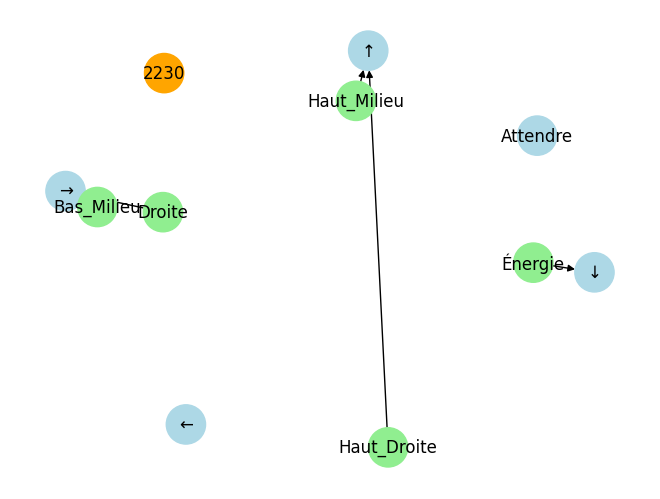

In [ ]:
import neat
import pickle
import networkx as nx
import matplotlib.pyplot as plt




# Charger le gagnant
with open("winner.pkl", "rb") as f:
    winner = pickle.load(f)

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    "config_genomes.txt"
)

# --- Construire le graphe networkx ---
G = nx.DiGraph()

# Ajouter les nœuds
for node_key in winner.nodes:
    G.add_node(node_key)

# Ajouter les connexions
for cg in winner.connections.values():
    if cg.enabled:
        src, dst = cg.key
        G.add_edge(src, dst, weight=cg.weight)

# --- Identifier entrées/sorties/cachés ---
input_nodes = set(config.genome_config.input_keys)
output_nodes = set(config.genome_config.output_keys)

hidden_nodes = set(winner.nodes.keys()) - input_nodes - output_nodes

print("Entrées :", input_nodes)
print("Sorties :", output_nodes)
print("Cachés  :", hidden_nodes)

# --- Dessiner avec couleurs différentes ---
color_map = []
for node in G.nodes():
    if node in input_nodes:
        color_map.append("lightgreen")   # entrées
    elif node in output_nodes:
        color_map.append("lightblue")    # sorties
    else:
        color_map.append("orange")       # cachés

pos = nx.spring_layout(G)
# Créer un dictionnaire "étiquettes" à afficher
labels = {n: node_names.get(n, str(n)) for n in G.nodes()}

# Dessiner avec les labels personnalisés
pos = nx.spring_layout(G, seed=42)  # position stable
nx.draw(G, pos, labels=labels, with_labels=True,
        node_color=color_map, node_size=800, arrows=True)

plt.show()


In [1]:
import neat
import pickle
import networkx as nx
import matplotlib.pyplot as plt

def draw_neat_network(genome, config, node_names=None):
 
    G = nx.DiGraph()

    for node_key in genome.nodes:
        G.add_node(node_key)

    for cg in genome.connections.values():
        if cg.enabled:
            src, dst = cg.key
            G.add_edge(src, dst, weight=cg.weight)

    input_nodes = list(config.genome_config.input_keys)
    output_nodes = list(config.genome_config.output_keys)
    hidden_nodes = list(set(genome.nodes.keys()) - set(input_nodes) - set(output_nodes))

    color_map = []
    for node in G.nodes():
        if node in input_nodes:
            color_map.append("lightgreen")
        elif node in output_nodes:
            color_map.append("lightblue")
        else:
            color_map.append("orange")

    def layer_positions(nodes, y, x_start=0):
        """Retourne les positions (x, y) des nœuds d'une même couche"""
        if len(nodes) == 0:
            return {}
        spacing = 2.0
        x_offset = -(len(nodes) - 1) * spacing / 2
        return {n: (x_start + i * spacing + x_offset, y) for i, n in enumerate(sorted(nodes))}

    pos = {}
    pos.update(layer_positions(input_nodes, y=0))
    pos.update(layer_positions(hidden_nodes, y=2))
    pos.update(layer_positions(output_nodes, y=4))

    # --- Labels lisibles ---
    if node_names is None:
        labels = {n: str(n) for n in G.nodes()}
    else:
        labels = {n: node_names.get(n, str(n)) for n in G.nodes()}

    # --- Dessin du graphe ---
    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, with_labels=True, labels=labels,
            node_color=color_map, node_size=1200,
            arrows=True, font_size=8)

    # --- Étiquettes des poids des connexions ---
    labels_edges = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos,
        edge_labels={k: f"{v:.2f}" for k, v in labels_edges.items()},
        font_size=6, label_pos=0.4)

    plt.title("Réseau NEAT (entrées → sorties)")
    plt.axis("off")
    plt.tight_layout()
    plt.show()


# ===============================================================
# === Exemple d’utilisation ===
# ===============================================================

# Charger le gagnant
with open("winner.pkl", "rb") as f:
    winner = pickle.load(f)

# Charger la configuration NEAT
config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    "config_genomes.txt"
)

# Exemple de dictionnaire de noms (à adapter à ton cas)
node_names = {
    # Entrées
    -1: "Haut_Gauche", -2: "Haut_Milieu", -3: "Haut_Droite", -4: "Gauche", -5: "Case", -6: "Droite", -7: "Bas_Gauche", -8: "Bas_Milieu", -9: "Bas_Droite",
    -10: "Énergie", -11: "t", -12: "x", -13: "y",
    
    # Sorties
    0: "↑", 1: "↓", 2: "←", 3: "→", 4: "Attendre"
}

# Affichage du réseau
draw_neat_network(winner, config, node_names)


FileNotFoundError: [Errno 2] No such file or directory: 'winner.pkl'